In [31]:
import pandas as pd


df = pd.read_csv("train_with_dense_context.csv")

df['context_len'] = df['context'].apply(lambda x: len(x.split()))
df

,id,prompt,A,B,C,D,E,answer,prompt_id,text,context,context_len
0,0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,0,"In astronomy and cosmology, baryonic dark matt...","In astronomy and cosmology, baryonic dark matt...",7707
1,1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,1,"In computer architecture, dynamic voltage scal...","In computer architecture, dynamic voltage scal...",14391
2,2,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,2,[[Image:Triskele-Symbol1.svg|right|thumb|200px...,[[Image:Triskele-Symbol1.svg|right|thumb|200px...,13043
3,3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,3,"In physics and applied mathematics, analytical...","In physics and applied mathematics, analytical...",17752
4,4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,4,"In astronomy, angular diameter distance is a d...","In astronomy, angular diameter distance is a d...",12149
...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,What is the relation between the three moment ...,The three moment theorem expresses the relatio...,The three moment theorem is used to calculate ...,The three moment theorem describes the relatio...,The three moment theorem is used to calculate ...,The three moment theorem is used to derive the...,C,195,"In solid mechanics, a bending moment is the re...","In solid mechanics, a bending moment is the re...",11849
196,196,"What is the throttling process, and why is it ...",The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,The throttling process is a steady adiabatic f...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,B,196,Bandwidth throttling consists in the intention...,Bandwidth throttling consists in the intention...,12800
197,197,What happens to excess base metal as a solutio...,"The excess base metal will often solidify, bec...",The excess base metal will often crystallize-o...,"The excess base metal will often dissolve, bec...","The excess base metal will often liquefy, beco...","The excess base metal will often evaporate, be...",B,197,"In metallurgy, cold forming or cold working is...","In metallurgy, cold forming or cold working is...",6390
198,198,"What is the relationship between mass, force, ...",Mass is a property that determines the weight ...,Mass is an inertial property that determines a...,Mass is an inertial property that determines a...,Mass is an inertial property that determines a...,Mass is a property that determines the size of...,D,198,Accelerations in special relativity (SR) follo...,Accelerations in special relativity (SR) follo...,23045


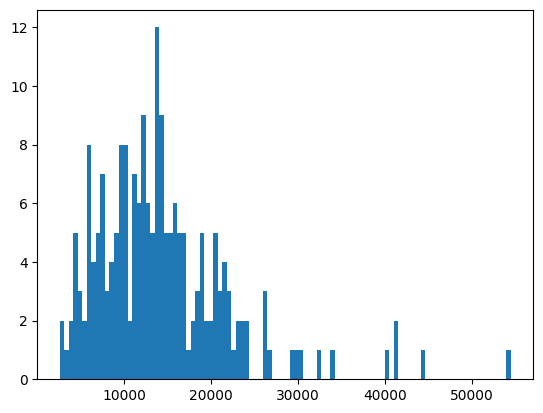

In [32]:
import matplotlib.pyplot as plt

plt.hist(df['context_len'], bins=100);

In [29]:
df['context_len'].sum() / len(df)

15209.145

In [30]:

def split_text(text, word_limit=1000):
    words = text.split()
    chunks = [words[i:i + word_limit] for i in range(0, len(words), word_limit)]
    return [' '.join(chunk) for chunk in chunks]

df['context_splitted'] = df['context'].apply(split_text)
df = df.explode('context_splitted')
df['context'] = df['context_splitted'].apply(lambda x: x.strip())

df.to_csv("train_context_exploded.csv")

df

,prompt,context,A,B,C,D,E,answer,context_len,context_splitted
0,Which of the following statements accurately d...,The presence of a clustered thick disk-like co...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,20679,The presence of a clustered thick disk-like co...
0,Which of the following statements accurately d...,proportion of the dark matter in the universe ...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,20679,proportion of the dark matter in the universe ...
0,Which of the following statements accurately d...,"to be accurate, these works only describe the ...",MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,20679,"to be accurate, these works only describe the ..."
0,Which of the following statements accurately d...,thumb|458x458px|The distribution of known bary...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,20679,thumb|458x458px|The distribution of known bary...
0,Which of the following statements accurately d...,"Newtonian Gravity, Then and Now); and Prof R F...",MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,20679,"Newtonian Gravity, Then and Now); and Prof R F..."
...,...,...,...,...,...,...,...,...,...,...
199,What did Arthur Eddington discover about two o...,expeditions – and the question of specific sys...,Arthur Eddington showed that two of Einstein's...,Arthur Eddington showed that two of Einstein's...,Arthur Eddington showed that two of Einstein's...,Arthur Eddington showed that two of Einstein's...,Arthur Eddington showed that two of Einstein's...,C,12004,expeditions – and the question of specific sys...
199,What did Arthur Eddington discover about two o...,ways the methods of Newtonian physics are unab...,Arthur Eddington showed that two of Einstein's...,Arthur Eddington showed that two of Einstein's...,Arthur Eddington showed that two of Einstein's...,Arthur Eddington showed that two of Einstein's...,Arthur Eddington showed that two of Einstein's...,C,12004,ways the methods of Newtonian physics are unab...
199,What did Arthur Eddington discover about two o...,"and up-to-date positions, and not in the direc...",Arthur Eddington showed that two of Einstein's...,Arthur Eddington showed that two of Einstein's...,Arthur Eddington showed that two of Einstein's...,Arthur Eddington showed that two of Einstein's...,Arthur Eddington showed that two of Einstein's...,C,12004,"and up-to-date positions, and not in the direc..."
199,What did Arthur Eddington discover about two o...,systematic errors and possibly confirmation bi...,Arthur Eddington showed that two of Einstein's...,Arthur Eddington showed that two of Einstein's...,Arthur Eddington showed that two of Einstein's...,Arthur Eddington showed that two of Einstein's...,Arthur Eddington showed that two of Einstein's...,C,12004,systematic errors and possibly confirmation bi...






```bash
python3 tools/predict.py        /home/viktor/Documents/kaggle/kaggle_llm/work_dirs/evaluate_on_many_sentences/train_context_exploded.csv         --output-dir /home/viktor/Documents/kaggle/kaggle_llm/work_dirs/evaluate_on_many_sentences/results --max-input 1000 --preprocess_type "deotte"
```